In [1]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, TruncatedSVD

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv("C:/Users/abdelFerdous/Desktop/integrify/mlData science/Bank_Segmentation_project/bank_transactions.csv")
df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [4]:
df.describe()

,CustAccountBalance,TransactionTime,TransactionAmount (INR)
count,1.046198e+06,1.048567e+06,1.048567e+06
mean,1.154035e+05,1.570875e+05,1.574335e+03
std,8.464854e+05,5.126185e+04,6.574743e+03
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.721760e+03,1.240300e+05,1.610000e+02
50%,1.679218e+04,1.642260e+05,4.590300e+02
75%,5.765736e+04,2.000100e+05,1.200000e+03
max,1.150355e+08,2.359590e+05,1.560035e+06


In [7]:
c = sum(df["CustGender"] == 'F')
c

281936

In [9]:
c = sum(df["CustGender"] == 'M')
c

765530

In [10]:
list(set(df["CustLocation"]))

['SANTACRUZ (EAST) MUMBAI',
 'CIRCLE KATARGAM SURAT',
 'JAYAKONDAM',
 'PHASE I PHINJEWADI PUNE',
 'BORIVALI WEST MUMBAI',
 'KODAGU',
 'MIRA ROAD EAST  MUMBAI',
 'GANDHI STACHE NASHIK',
 'THRUVANNAMALAI',
 'SOUTH MORANG',
 'MARRIEGE HOUSE GORAKHPUR',
 'RING ROAD SURAT',
 'KUKATPALLY TIRUMALAGIRI HYDERABAD',
 'LUDHIANA KHANNA',
 'PARK SOC SURAT',
 'NAHAN',
 'VASAI W THANE',
 'PABIACHERRA SCHOOL NORTH TRIPURA',
 'BIAWAR',
 'BANGALORE SOUTH BANGALORE',
 'KHANNA DIST-LUDHIANA',
 'DHARMAPURI',
 'RANGAREDDI HYDERABAD',
 'AMMIS BIRIYANI BANGALORE',
 'USGAON',
 'PAVANSERE',
 'BAREILLY',
 'HARIDWAR',
 'NR RAVJIBHAI TOWER AHMEDABAD',
 'POLLACHI',
 'MIRA ROAD THANE',
 'PORVORIM BARDEZ',
 'JAIL ROAD NASHIK ROAD NASHIK',
 'TRIMULGHERRY HYDERABAD',
 'BELTHANGADI',
 'ANDROTH',
 'KALHER VILLAGE BHIWANDI THANE',
 'MANDALGARH',
 'TIHIDI',
 'KUWAIT CITY',
 'CUNCOLIM SALCETTE',
 'CAMP PUNE',
 'MUKSAR',
 'TIRUMALAGIRI BOWENPALLY HYDERABAD',
 'THANE W',
 'CHIKUWADI SURAT',
 'DIST NAVSARI',
 'AMORHA',
 'SHIVA

In [5]:
df.nunique()

TransactionID              1048567
CustomerID                  884265
CustomerDOB                  17254
CustGender                       3
CustLocation                  9355
CustAccountBalance          161328
TransactionDate                 55
TransactionTime              81918
TransactionAmount (INR)      93024
dtype: int64

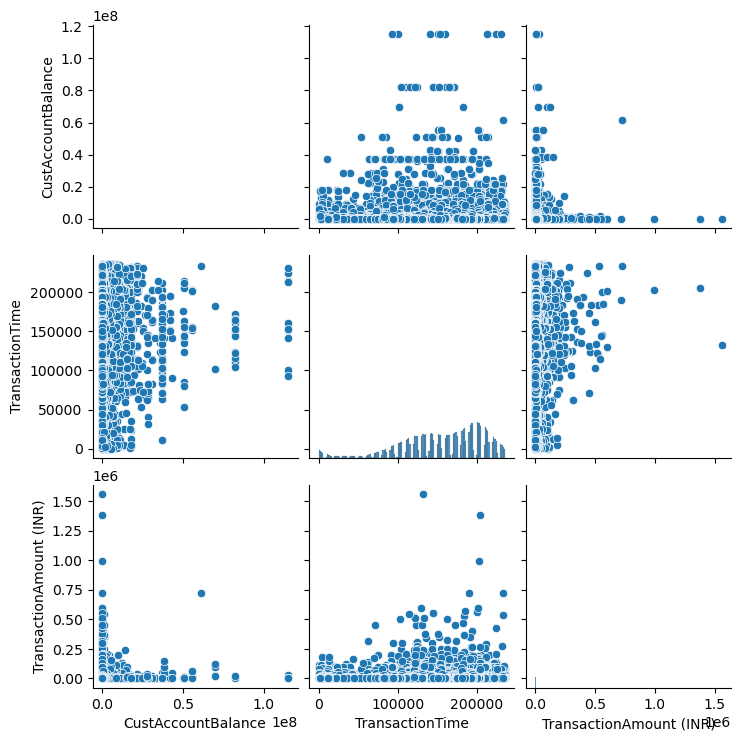

In [11]:
sns.pairplot(df)
plt.show()

array([[<Axes: title={'center': 'CustAccountBalance'}>,
        <Axes: title={'center': 'TransactionTime'}>],
       [<Axes: title={'center': 'TransactionAmount (INR)'}>, <Axes: >]],
      dtype=object)

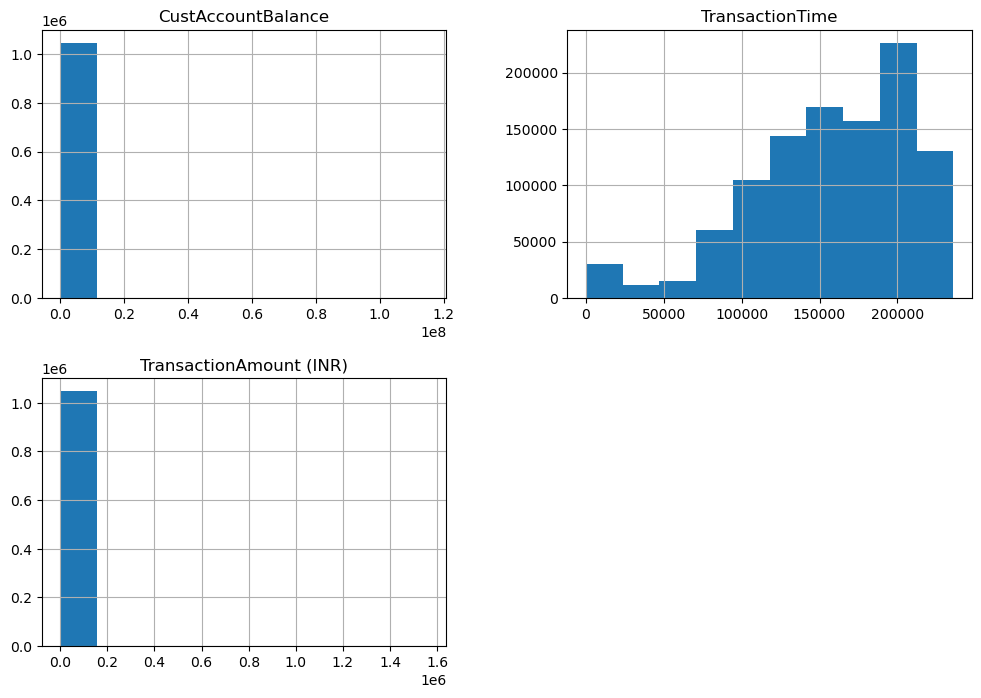

In [12]:
numerical_columns = df.select_dtypes(include=np.number).columns
df[numerical_columns].hist(figsize=(12, 8))

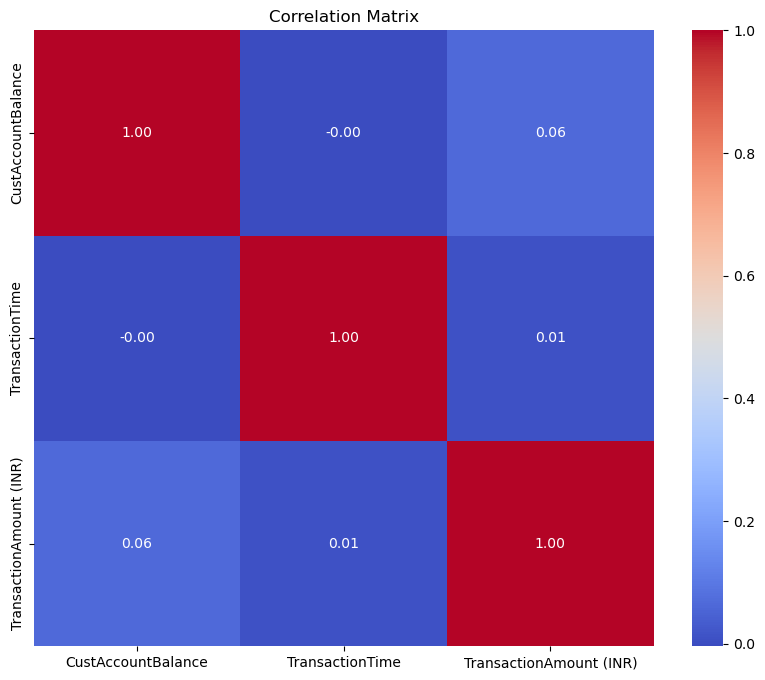

In [13]:
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

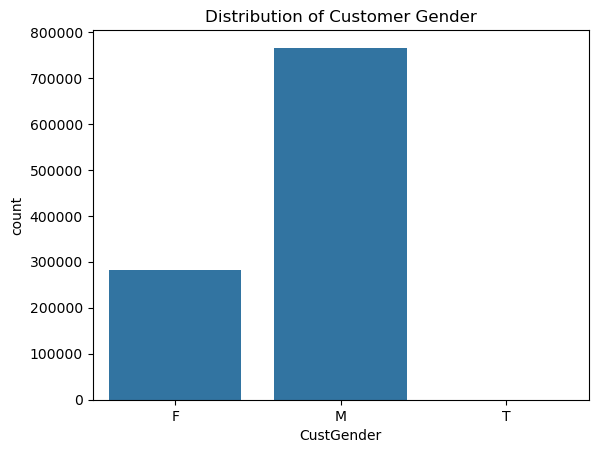

In [14]:
sns.countplot(x='CustGender', data=df)
plt.title('Distribution of Customer Gender')
plt.show()

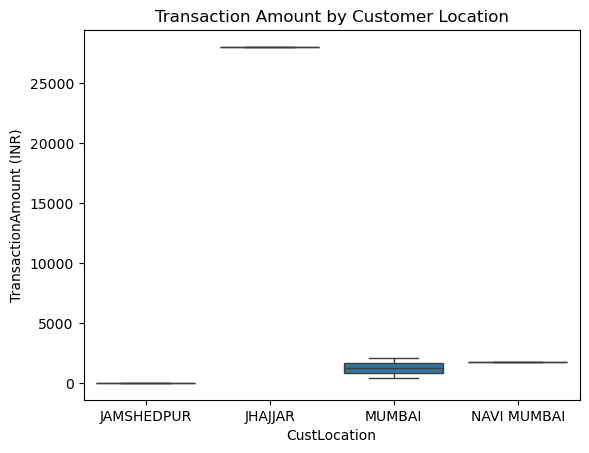

In [17]:

sns.boxplot(x='CustLocation', y='TransactionAmount (INR)', data=df.head())
plt.title('Transaction Amount by Customer Location')
plt.show()

In [5]:
from scipy.stats import ttest_ind

# there is a significant difference in the TRANSACTION amounts among different Genders.

In [6]:
male_transactions = df[df['CustGender'] == 'M']['TransactionAmount (INR)']
female_transactions = df[df['CustGender'] == 'F']['TransactionAmount (INR)']

t_stat, p_value = ttest_ind(male_transactions, female_transactions)

print(f"t-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

t-statistic: -7.744279629227615
P-value: 9.621054067943416e-15
Reject the null hypothesis
